<a href="https://colab.research.google.com/github/rakshitha-sathyakumar/twitter-COVID-19-analysis/blob/master/sentiment-analysis/sentiment_analysis_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import logging
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname) s : %(message)s', level=logging.INFO)

#Set random seed
np.random.seed(24)

In [ ]:
df_vader = pd.read_csv("/content/drive/My Drive/256 project/Data/vader_sentimant.csv")

In [ ]:
df_vader

,Unnamed: 0,clean_text,Compound,Positive,Negative,Neutral,Analysis
0,0,accounting software reduce impact coronavirus ...,0.0000,0.000,0.000,1.000,Neutral
1,1,people know behave covid19 canadian perspectiv...,0.0000,0.000,0.000,1.000,Neutral
2,2,rt silver lining amidst chaoswe poorvikamobil...,0.7003,0.326,0.000,0.674,Positive
3,3,rt harun cumen balikesir prison couldnt see k...,-0.5106,0.000,0.171,0.829,Negative
4,4,oximeters wont steal fingerprints turning tech...,0.7669,0.424,0.000,0.576,Positive
...,...,...,...,...,...,...,...
29143,29143,rt emerging technologies tracking covid19 pan...,0.0000,0.000,0.000,1.000,Neutral
29144,29144,rt emerging technologies tracking covid19 pan...,0.0000,0.000,0.000,1.000,Neutral
29145,29145,rt emerging technologies tracking covid19 pan...,0.0000,0.000,0.000,1.000,Neutral
29146,29146,wow spain amp france dont new daily cases that...,0.8979,0.476,0.000,0.524,Positive


In [ ]:
le = preprocessing.LabelEncoder()
df_vader['Sentiment'] = le.fit_transform(df_vader['Analysis'])
df_vader['Sentiment']

0        1
1        1
2        2
3        0
4        2
        ..
29143    1
29144    1
29145    1
29146    2
29147    0
Name: Sentiment, Length: 29148, dtype: int64

In [ ]:
df_vader.head()

,Unnamed: 0,clean_text,Compound,Positive,Negative,Neutral,Analysis,Sentiment
0,0,accounting software reduce impact coronavirus ...,0.0000,0.000,0.000,1.000,Neutral,1
1,1,people know behave covid19 canadian perspectiv...,0.0000,0.000,0.000,1.000,Neutral,1
2,2,rt silver lining amidst chaoswe poorvikamobil...,0.7003,0.326,0.000,0.674,Positive,2
3,3,rt harun cumen balikesir prison couldnt see k...,-0.5106,0.000,0.171,0.829,Negative,0
4,4,oximeters wont steal fingerprints turning tech...,0.7669,0.424,0.000,0.576,Positive,2


In [ ]:
np.unique(df_vader.Analysis)

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
df_vader.Analysis.value_counts()

Neutral     11958
Positive    10264
Negative     6926
Name: Analysis, dtype: int64

In [ ]:
df_vader.columns

Index(['Unnamed: 0', 'clean_text', 'Compound', 'Positive', 'Negative',
       'Neutral', 'Analysis', 'Sentiment'],
      dtype='object')

In [ ]:
to_drop = ['Unnamed: 0', 'Compound', 'Positive', 'Negative', 'Neutral', 'Analysis']
df_vader = df_vader.drop(to_drop, axis =1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_vader['clean_text'], df_vader['Sentiment'], test_size = 0.20, random_state = 100)
train_dataset = pd.DataFrame({'Tweet': X_train,'Sentiment': y_train})
test_dataset = pd.DataFrame({'Tweet': X_test,'Sentiment': y_test})
print("Number of positive, negative and neutral sentiment values in train set")
print(train_dataset['Sentiment'].value_counts())
print("**************************************************")
print("**************************************************")
print("NNumber of positive, negative and neutral sentiment values in test set")
print(test_dataset['Sentiment'].value_counts())

Number of positive, negative and neutral sentiment values in train set
1    9535
2    8266
0    5517
Name: Sentiment, dtype: int64
**************************************************
**************************************************
NNumber of positive, negative and neutral sentiment values in test set
1    2423
2    1998
0    1409
Name: Sentiment, dtype: int64


In [ ]:
tokenizer = Tokenizer(num_words = 2000, split = ' ')
tokenizer.fit_on_texts(train_dataset['Tweet'].astype(str).values)
train_tweets = tokenizer.texts_to_sequences(train_dataset['Tweet'].astype(str).values)
max_len = max([len(i) for i in train_tweets])
train_tweets = pad_sequences(train_tweets, maxlen = max_len)
test_tweets = tokenizer.texts_to_sequences(test_dataset['Tweet'].astype(str).values)
test_tweets = pad_sequences(test_tweets, maxlen = max_len)

In [ ]:
model = Sequential()
model.add(Embedding(2000, 128, input_length = train_tweets.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, dropout = 0.2))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 18, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 651,011
Trainable params: 651,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_tweets, pd.get_dummies(train_dataset['Sentiment']).values, epochs = 20, batch_size = 128, validation_split = 0.2)

Epoch 1/20
146/146 [==============================] - 26s 178ms/step - loss: 0.1041 - accuracy: 0.9617 - val_loss: 0.5285 - val_accuracy: 0.8795
Epoch 2/20
146/146 [==============================] - 26s 179ms/step - loss: 0.0994 - accuracy: 0.9636 - val_loss: 0.5613 - val_accuracy: 0.8823
Epoch 3/20
146/146 [==============================] - 26s 180ms/step - loss: 0.0921 - accuracy: 0.9660 - val_loss: 0.5634 - val_accuracy: 0.8784
Epoch 4/20
146/146 [==============================] - 26s 181ms/step - loss: 0.0891 - accuracy: 0.9668 - val_loss: 0.5708 - val_accuracy: 0.8789
Epoch 5/20
146/146 [==============================] - 26s 177ms/step - loss: 0.0840 - accuracy: 0.9696 - val_loss: 0.6030 - val_accuracy: 0.8829
Epoch 6/20
146/146 [==============================] - 26s 179ms/step - loss: 0.0813 - accuracy: 0.9705 - val_loss: 0.6148 - val_accuracy: 0.8819
Epoch 7/20
146/146 [==============================] - 26s 177ms/step - loss: 0.0770 - accuracy: 0.9723 - val_loss: 0.6272 - val_ac

In [ ]:
y_pred = model.predict(test_tweets)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
score, accuracy = model.evaluate(test_tweets, pd.get_dummies(test_dataset['Sentiment']).values, batch_size = 128)
print("Test accuracy: {}".format(accuracy))

46/46 [==============================] - 3s 55ms/step - loss: 0.6608 - accuracy: 0.8889
Test accuracy: 0.888850748538971


In [ ]:
class_name = ['Negative', 'Neutral', 'Positive']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred, target_names=class_name))

              precision    recall  f1-score   support

    Negative       0.85      0.83      0.84      1409
     Neutral       0.91      0.91      0.91      2423
    Positive       0.89      0.91      0.90      1998

    accuracy                           0.89      5830
   macro avg       0.88      0.88      0.88      5830
weighted avg       0.89      0.89      0.89      5830



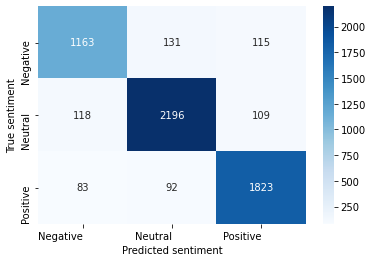

<Figure size 864x576 with 0 Axes>

In [ ]:
def show_confusion_matrix(confusion_matrix):
  heatmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right')
  plt.xlabel('Predicted sentiment');
  plt.ylabel('True sentiment')
  plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
dfvader_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(dfvader_cm)
plt.savefig('/content/drive/My Drive/256 project/Figures/confusionmatrix_lstm.svg')